In [51]:
%matplotlib notebook
import matplotlib.pyplot as plt
import glob
import pickle
import dashi
import numpy as np
dashi.visual()

In [58]:
files = glob.glob("data/bias_col_window_20deg_*.pkl")
print(files)
bias = pickle.load(open(files[0],'r'))

for f in files[1:]:
    b = pickle.load(open(f,'r'))
    for k in b.keys():
        for n in b[k].keys():
            #print(b[k][n])
            if(n in bias[k].keys()):
                bias[k][n] +=b[k][n]
            else:
                bias[k][n] =b[k][n]

['data/bias_col_window_20deg_1.pkl']


<IPython.core.display.Javascript object>


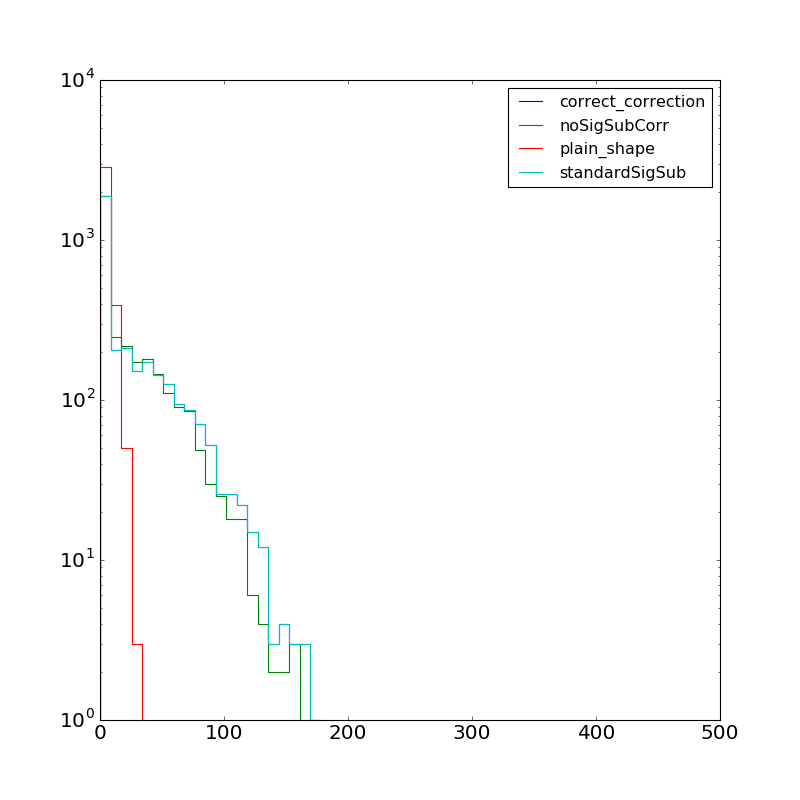

3300
3300
3300
3300


In [59]:
plt.figure(figsize=(10,10))
for k in bias.keys():
    hist = dashi.histogram.hist1d(np.linspace(0,500,60))
    a = np.array(bias[k][0])
    print(len(a))
    if(k=='plain_shape'):
        a/=6
    hist.fill(a)
    hist.line(label=str(k))
plt.yscale('log')
plt.legend()

In [60]:
print(sorted(bias.keys()))
label_names = {'original_correction':'published GC',
               'standardSigSub':'C',
               'correct_correction':'Correct signal subtraction',
               'noSigSubCorr':'No signal subtraction',
               'plain_shape':'Shape likelihood'}
print(sorted(bias[bias.keys()[0]]))

['correct_correction', 'noSigSubCorr', 'plain_shape', 'standardSigSub']
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


<IPython.core.display.Javascript object>


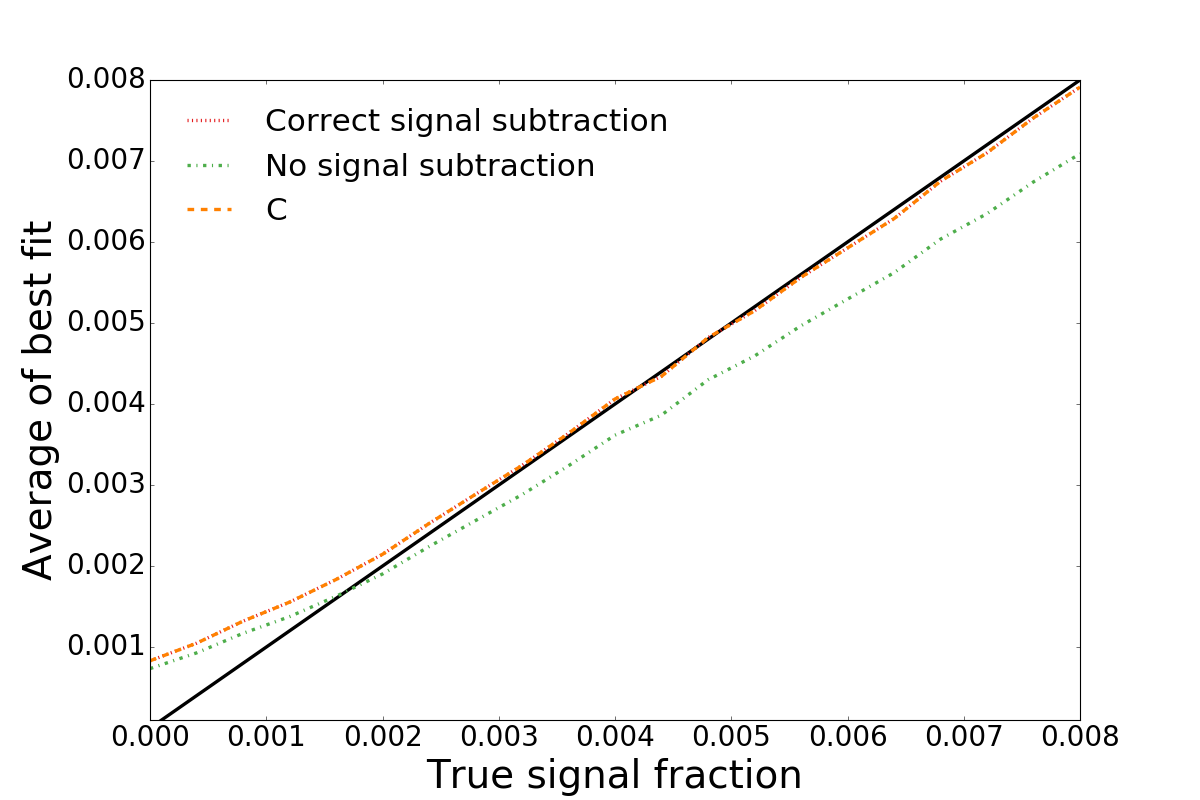

<IPython.core.display.Javascript object>


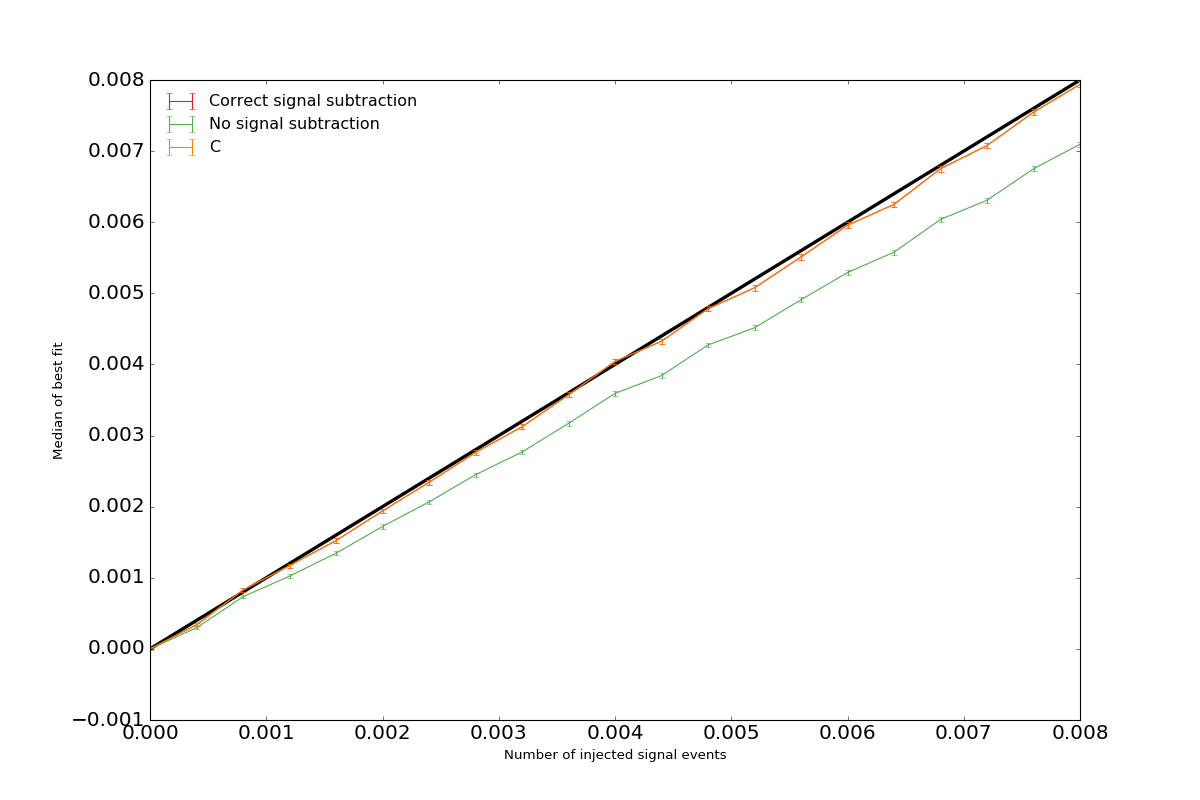

<IPython.core.display.Javascript object>


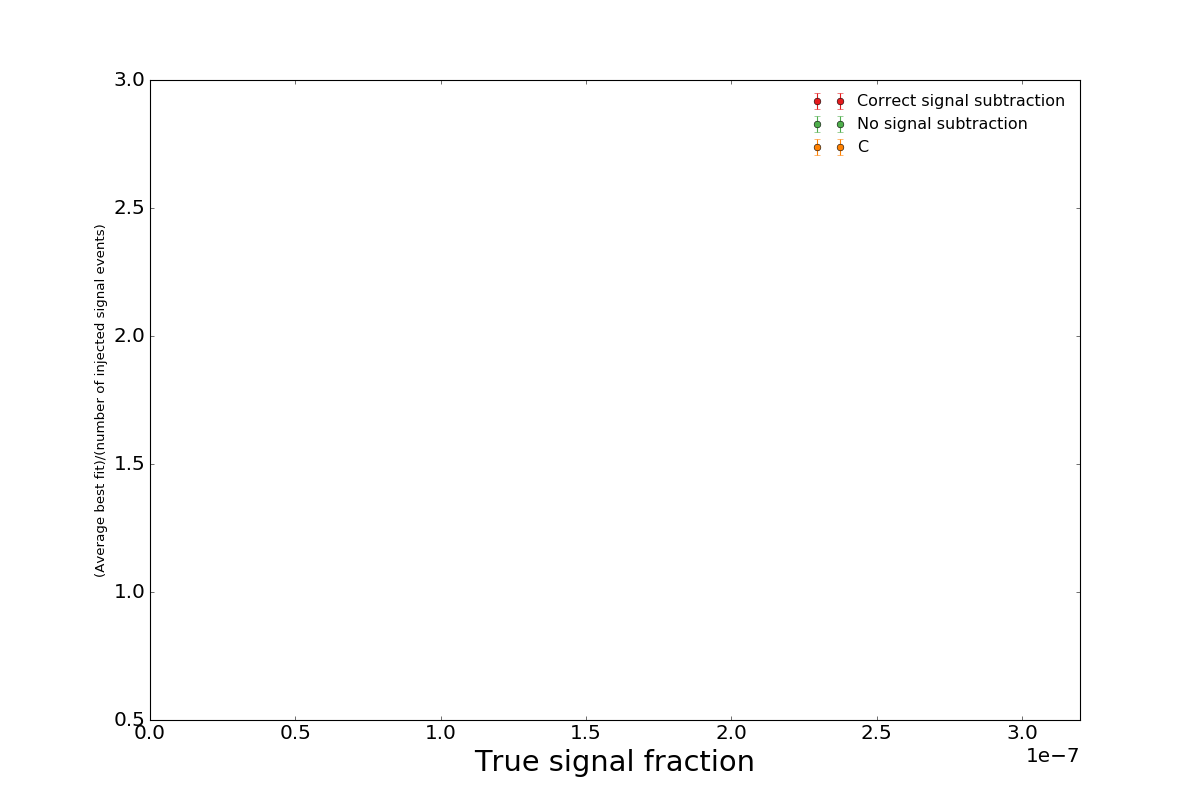

In [61]:
path = ""#'/home/sflis/Dropbox/WorkFolder/PhDThesis/Thesis1/parts/DarkMatterSearches/AnalysisMethod/figures/'
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
x = np.linspace(0.000,0.008,100)
plt.figure(2,figsize=(15,10))
plt.plot(x,x,color='black',lw=3)
plt.figure(3,figsize=(15,10))
plt.plot(x,x,color='black',lw=3)
plt.figure(4,figsize=(15,10))

import matplotlib.colors as colors
import matplotlib.cm as cm
jet = colors.Colormap('jet')
#cNorm  = colors.Normalize(vmin=0, vmax=1)
#scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#cNorm  = colors.Normalize(vmin=0, vmax=0)
#scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
i  = 0.
ls = ['--',':','-.','--']
for k in sorted(bias.keys()):
    if(k=='plain_shape'):
        continue
    if(isinstance(k,float)):
        cv = cm.viridis(k)#scalarMap.to_rgba(float(k))
    else:
        cv = cm.Set1(i/len(bias.keys()))
        i+=1.0
    #if('no' in k):
    #    continue
    av = list()
    median = list()
    ns = list()
    av_err = list()
    median_err = list()
    for n in bias[k].keys():
        av.append(np.mean(bias[k][n]))
        av_err.append(np.std(bias[k][n])/np.sqrt(len(bias[k][n])))
        ns.append(n)
        median.append(np.median(bias[k][n]))
    ns, av,median,av_err = zip(*sorted(zip(ns,av,median,av_err)))
    ns = np.array(ns)/2.5e4
    av = np.array(av)/2.5e4
    median = np.array(median)/2.5e4
    av_err = np.array(av_err)/2.5e4
    if(k=='plain_shape' and ('nowindow' not in files[0])):
        av /= 6
        median /= 6
        av_err /=6
    plt.figure(2)
    plt.plot(ns,av,label=label_names[k],color=cv,ls=ls[int(i)],lw=3)#yerr=av_err
    plt.figure(3)
    plt.errorbar(ns,median,yerr=av_err,label=label_names[k],color=cv)
    plt.figure(4)
    plt.errorbar(ns[1:],av[1:]/ns[1:],yerr=av_err[1:]/ns[1:],label=label_names[k],ls='None',marker='o',color=cv,)
    if(k==0 or k==1):
        plt.figure(2)
        plt.errorbar(ns,av,yerr=av_err,color='red',lw=2)
        plt.figure(3)
        plt.errorbar(ns,median,yerr=av_err,color='red',lw=2)

fontsize = 35        
plt.figure(4)
plt.hlines(1,min(ns[1:]),max(ns[1:]))
plt.legend(loc='best',frameon=False)
plt.xlabel('True signal fraction',size=26)
plt.ylabel('(Average best fit)/(number of injected signal events)')
#plt.ylim((0.8,1.2))
#plt.ylim((0.95,1.05))
plt.xlim((0,np.max(ns/2.5e4)))

plt.figure(2)
plt.tick_params(labelsize=25)
plt.xlabel('True signal fraction',size=fontsize)
plt.ylabel('Average of best fit',size=fontsize)
plt.ylim((0.0001,0.008))
#plt.yscale('log')
plt.legend(loc='best',frameon=False,fontsize=28)
plt.savefig(path+'SignalSubtractionBias.pdf')

plt.figure(3)
plt.legend(loc='best',frameon=False)
plt.xlabel('Number of injected signal events')
plt.ylabel('Median of best fit')

